# Importaciones de librerías

In [1]:
from scikitplot.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from src.modeling.utils.utils import print_scores
from src.modeling.utils.utils import drop_dataset_unnecessary_columns
from src.preparation.data_access.obtained_text_da import ObtainedTextDA

/home/hans/Documentos/Tesis_Chatbot/env/lib/python3.8/site-packages/sqlalchemy/orm/util.py:104: SAWarning: The 'delete-orphan' cascade option requires 'delete'.
  util.warn(


# Constantes

In [2]:
OT_DA = ObtainedTextDA()
TEXTS = OT_DA.select_all_as_dataframe()
TEXTS = TEXTS.drop(columns=['cluster_grade'])
TEST_SIZE = 0.2
DATA_COLUMNS = [c for c in TEXTS.columns if c not in ['category', 'filename', 'grade', 'id']]

# Todas las categorias

## Preprocesando los datos

In [3]:
X, y = drop_dataset_unnecessary_columns(TEXTS, ['filename', 'category', 'grade', 'id'], 'grade')
X[DATA_COLUMNS] = MinMaxScaler().fit_transform(X[DATA_COLUMNS])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=TEST_SIZE, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((147, 48), (37, 48), (147,), (37,))

## Entrenando los modelos

In [4]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_scores(y_test, y_pred)

The accuracy score is: 0.8108108108108109
The precision score is: 0.7777777777777778
The recall score is: 0.8235294117647058
The F1 score is: 0.7999999999999999


### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

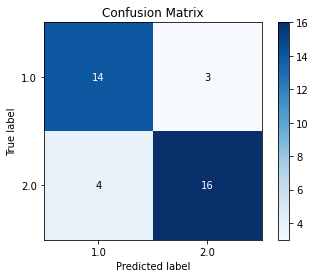

In [5]:
plot_confusion_matrix(y_test, y_pred)